In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import matplotlib.tri as tri
from dataset import *

In [120]:
df = pd.read_pickle('microstucture_big_NU_2.pkl')
df.head()

,curve_n,curve_area,sizes,ratios,roundness,damage,shrinkage,stiffness_ratio,aggregate_ratio,curve_16,curve_8,curve_4,mortar_damage,interface,stiffness_1,stiffness_2,damage_profile,volume_profile
0,"[1, 13, 0]","[105.80074636770647, 227.96328911964014, 0.0]","{16: [[12.156105356917523, 10.623884723487098]...","{16: [1.1442241395977328], 8: [1.4751999563701...","{16: [0.79153385961529], 8: [0.605976146544928...",0.120315,-0.000243,0.651470,0.274462,0.316993,0.683007,0.0,0.285195,947,28208.836913,19604.002833,"[2.921512714237906e-05, 5.4334475862560794e-05...","[0.002040608087554574, 0.0019385777413845062, ..."
1,"[4, 0, 0]","[278.0806039902927, 0.0, 0.0]","{16: [[13.2100775605406, 8.901632629103986], [...","{16: [1.4840061493158128, 1.1343764452308507, ...","{16: [0.7175189460203348, 0.8022948062440893, ...",0.118787,-0.000244,0.639379,0.221814,1.000000,0.000000,0.0,0.240921,534,27921.997905,19274.518490,"[5.871646135346964e-05, 3.770788316614926e-05,...","[0.0031629425939172506, 0.003060912247747183, ..."
2,"[4, 0, 0]","[313.421728531106, 0.0, 0.0]","{16: [[14.478128114885118, 7.07690334800868], ...","{16: [2.045828154338015, 1.7307378409831589, 1...","{16: [0.7837420397213821, 0.7111899015206651, ...",0.136078,-0.000242,0.676005,0.248852,1.000000,0.000000,0.0,0.245848,546,28312.665224,20389.235616,"[3.5414890589891e-05, 5.06798860442359e-05, 6....","[0.002040608087554574, 0.002040608087554574, 0..."
3,"[3, 10, 0]","[218.03944019512616, 173.47923426585353, 0.0]","{16: [[10.690182333262214, 9.950449294945646],...","{16: [1.0743416720581973, 1.5227016310172952, ...","{16: [0.8521819843178768, 0.7467008904049787, ...",0.151569,-0.000212,0.674684,0.335170,0.556907,0.443093,0.0,0.340982,970,29515.532255,20298.165679,"[7.107409328455105e-05, 0.00019577619968913496...","[0.0035710642114281654, 0.004081216175109148, ..."
4,"[4, 5, 0]","[299.7357110559889, 69.95675483906378, 0.0]","{16: [[11.825311336277718, 7.229526295980998],...","{16: [1.6356965660186595, 2.5639894808309918, ...","{16: [0.7855563249650631, 0.4722256149583713, ...",0.129973,-0.000220,0.643299,0.283134,0.810770,0.189230,0.0,0.299074,812,28755.381703,19446.421266,"[4.777515277964994e-05, 6.886474147904664e-05,...","[0.003775124903768301, 0.0036730945575982332, ..."


In [121]:
df_n = pd.read_pickle('microstucture_big_NU.pkl')
df_n.head()

,curve_n,curve_area,sizes,ratios,roundness,damage,shrinkage,stiffness_ratio,aggregate_ratio,curve_16,curve_8,curve_4,mortar_damage,damage_profile,volume_profile,stiffness_1,stiffness_2
0,"[1, 13, 0]","[105.80074636770647, 227.96328911964014, 0.0]","{16: [[12.156105356917523, 10.623884723487098]...","{16: [1.1442241395977328], 8: [1.4751999563701...","{16: [0.79153385961529], 8: [0.605976146544928...",0.124488,-0.000233,0.701233,0.325941,0.316993,0.683007,0.0,0.285195,"[3.1146348192123696e-05, 3.798499164986424e-05...","[0.002040608087554574, 0.0019385777413845062, ...",28735.574484,20052.566528
1,"[4, 0, 0]","[278.0806039902927, 0.0, 0.0]","{16: [[13.2100775605406, 8.901632629103986], [...","{16: [1.4840061493158128, 1.1343764452308507, ...","{16: [0.7175189460203348, 0.8022948062440893, ...",0.107501,-0.000236,0.687639,0.271563,1.000000,0.000000,0.0,0.240921,"[7.562357495771721e-05, 5.696863809134811e-05,...","[0.0031629425939172506, 0.003060912247747183, ...",28591.337800,19420.990348
2,"[4, 0, 0]","[313.421728531106, 0.0, 0.0]","{16: [[14.478128114885118, 7.07690334800868], ...","{16: [2.045828154338015, 1.7307378409831589, 1...","{16: [0.7837420397213821, 0.7111899015206651, ...",0.125191,-0.000230,0.728256,0.306076,1.000000,0.000000,0.0,0.245848,"[4.7766483476152644e-05, 7.882997306296602e-05...","[0.002040608087554574, 0.002040608087554574, 0...",29147.272110,20709.323287
3,"[3, 10, 0]","[218.03944019512616, 173.47923426585353, 0.0]","{16: [[10.690182333262214, 9.950449294945646],...","{16: [1.0743416720581973, 1.5227016310172952, ...","{16: [0.8521819843178768, 0.7467008904049787, ...",0.125588,-0.000203,0.682841,0.382342,0.556907,0.443093,0.0,0.340982,"[3.2990854379022494e-05, 0.0001448042021365836...","[0.0035710642114281654, 0.004081216175109148, ...",30020.645857,20619.912744
4,"[4, 5, 0]","[299.7357110559889, 69.95675483906378, 0.0]","{16: [[11.825311336277718, 7.229526295980998],...","{16: [1.6356965660186595, 2.5639894808309918, ...","{16: [0.7855563249650631, 0.4722256149583713, ...",0.115385,-0.000211,0.682706,0.361028,0.810770,0.189230,0.0,0.299074,"[4.947499110130593e-05, 6.096927972976118e-05,...","[0.003775124903768301, 0.0036730945575982332, ...",29812.871218,20299.356580


In [122]:
damage = np.stack(df['damage_profile'].to_numpy())
volume = np.stack(df['volume_profile'].to_numpy())
df['aggregate_ratio'] = volume.sum(axis=1)
df['damage'] = damage.sum(axis=1)

In [123]:
damage_n = np.stack(df_n['damage_profile'].to_numpy())
volume_n = np.stack(df_n['volume_profile'].to_numpy())
df_n['aggregate_ratio'] = volume_n.sum(axis=1)
df_n['damage'] = damage_n.sum(axis=1)

In [124]:
ids_0 = np.arange(len(df))
ids_5 = np.argwhere(volume[:,-5:].sum(axis=1)==0).flatten()
ids_10 = np.argwhere(volume[:,-10:].sum(axis=1)==0).flatten()
ids_15 = np.argwhere(volume[:,-15:].sum(axis=1)==0).flatten()
ids_20 = np.argwhere(volume[:,-20:].sum(axis=1)==0).flatten()
ids_25 = np.argwhere(volume[:,-25:].sum(axis=1)==0).flatten()
ids_30 = np.argwhere(volume[:,-30:].sum(axis=1)==0).flatten()

ids = [ids_0, ids_5, ids_10, ids_15, ids_20, ids_25, ids_30]

for i in range(len(ids)):
    for j in range(i+1, len(ids)):
        ids[i] = np.setdiff1d(ids[i], ids[j])

In [125]:
ids_0 = np.arange(len(df_n))
ids_5 = np.argwhere(volume_n[:,-5:].sum(axis=1)==0).flatten()
ids_10 = np.argwhere(volume_n[:,-10:].sum(axis=1)==0).flatten()
ids_15 = np.argwhere(volume_n[:,-15:].sum(axis=1)==0).flatten()
ids_20 = np.argwhere(volume_n[:,-20:].sum(axis=1)==0).flatten()
ids_25 = np.argwhere(volume_n[:,-25:].sum(axis=1)==0).flatten()
ids_30 = np.argwhere(volume_n[:,-30:].sum(axis=1)==0).flatten()

ids_n = [ids_0, ids_5, ids_10, ids_15, ids_20, ids_25, ids_30]

for i in range(len(ids_n)):
    for j in range(i+1, len(ids_n)):
        ids_n[i] = np.setdiff1d(ids_n[i], ids_n[j])
        ids_n[i] = np.setdiff1d(ids_n[i], ids[i])

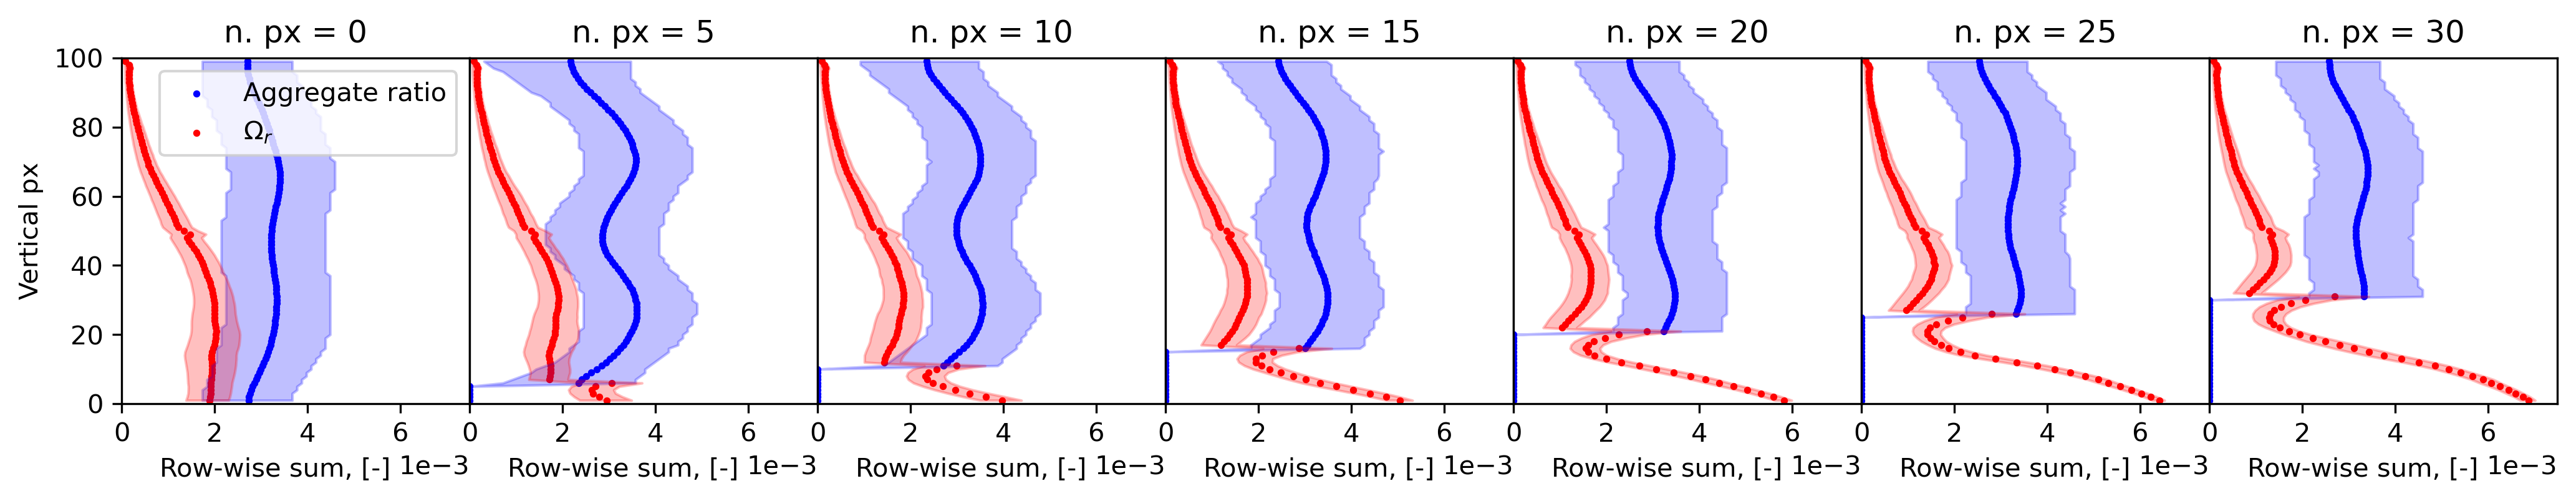

In [126]:
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(16.8, 2.4), dpi=300)
fig.subplots_adjust(wspace=0.0)
for i in range(7):
    volume_a = np.vstack([volume[ids[i]], volume_n[ids_n[i]]])
    damage_a = np.vstack([damage[ids[i]], damage_n[ids_n[i]]])
    ax[i].scatter(volume_a.mean(axis=0), np.arange(99,0,-1), c='blue', s=3)
    ax[i].scatter(damage_a.mean(axis=0), np.arange(99,0,-1), c='red', s=3)
    ax[i].fill_betweenx(np.arange(99,0,-1), np.quantile(volume_a, 0.25, axis=0), np.quantile(volume_a, 0.75, axis=0), color='blue', alpha=0.25)
    ax[i].fill_betweenx(np.arange(99,0,-1), np.quantile(damage_a, 0.25, axis=0), np.quantile(damage_a, 0.75, axis=0), color='red', alpha=0.25)
    ax[i].set_ylim([0, 100])
    ax[i].set_xlim([0, 0.0075])
    ax[i].set_xlabel('Row-wise sum, [-]     ')
    ax[i].set_title(f'n. px = {i*5}')
    ax[i].ticklabel_format(axis='x', style='sci',scilimits = (0,0))
    if i > 0:
        ax[i].set_yticks([])
ax[0].set_ylabel('Vertical px')       
ax[0].legend(['Aggregate ratio', '$\Omega_r$'])

In [127]:
mean_shr = []
mean_vol = []
mean_damage = []
mean_stf_1 = []
for i in range(7):
    mean_shr.append(-df['shrinkage'][ids[i]].mean())
    mean_vol.append(df['aggregate_ratio'][ids[i]].mean())
    mean_damage.append(df['damage'][ids[i]].mean())

In [128]:
volumes = np.linspace(0.15, 0.4, 10)
vols = np.zeros((7, 9))
shr = np.zeros((7, 9))
dam = np.zeros((7, 9))
stf_1 = np.zeros((7, 9))
stf_2 = np.zeros((7, 9))
for i in range(7):
    vol_a = np.hstack([volume[ids[i]].sum(axis=1), volume_n[ids_n[i]].sum(axis=1)])
    dam_a = np.hstack([damage[ids[i]].sum(axis=1), damage_n[ids_n[i]].sum(axis=1)])
    shr_a = np.hstack([df['shrinkage'][ids[i]].to_numpy(), df_n['shrinkage'][ids_n[i]].to_numpy()])
    stf_1_a = np.hstack([df['stiffness_1'][ids[i]].to_numpy(), df_n['stiffness_1'][ids_n[i]].to_numpy()])
    stf_2_a = np.hstack([df['stiffness_2'][ids[i]].to_numpy(), df_n['stiffness_2'][ids_n[i]].to_numpy()])
    for j in range(9):
        ix = np.argwhere((vol_a>volumes[j]) & (vol_a<volumes[j+1]))
        vols[i, j] = vol_a[ix].mean()
        shr[i, j] = shr_a[ix].mean()
        dam[i, j] = dam_a[ix].mean()
        stf_1[i, j] = stf_1_a[ix].mean()
        stf_2[i, j] = stf_2_a[ix].mean()

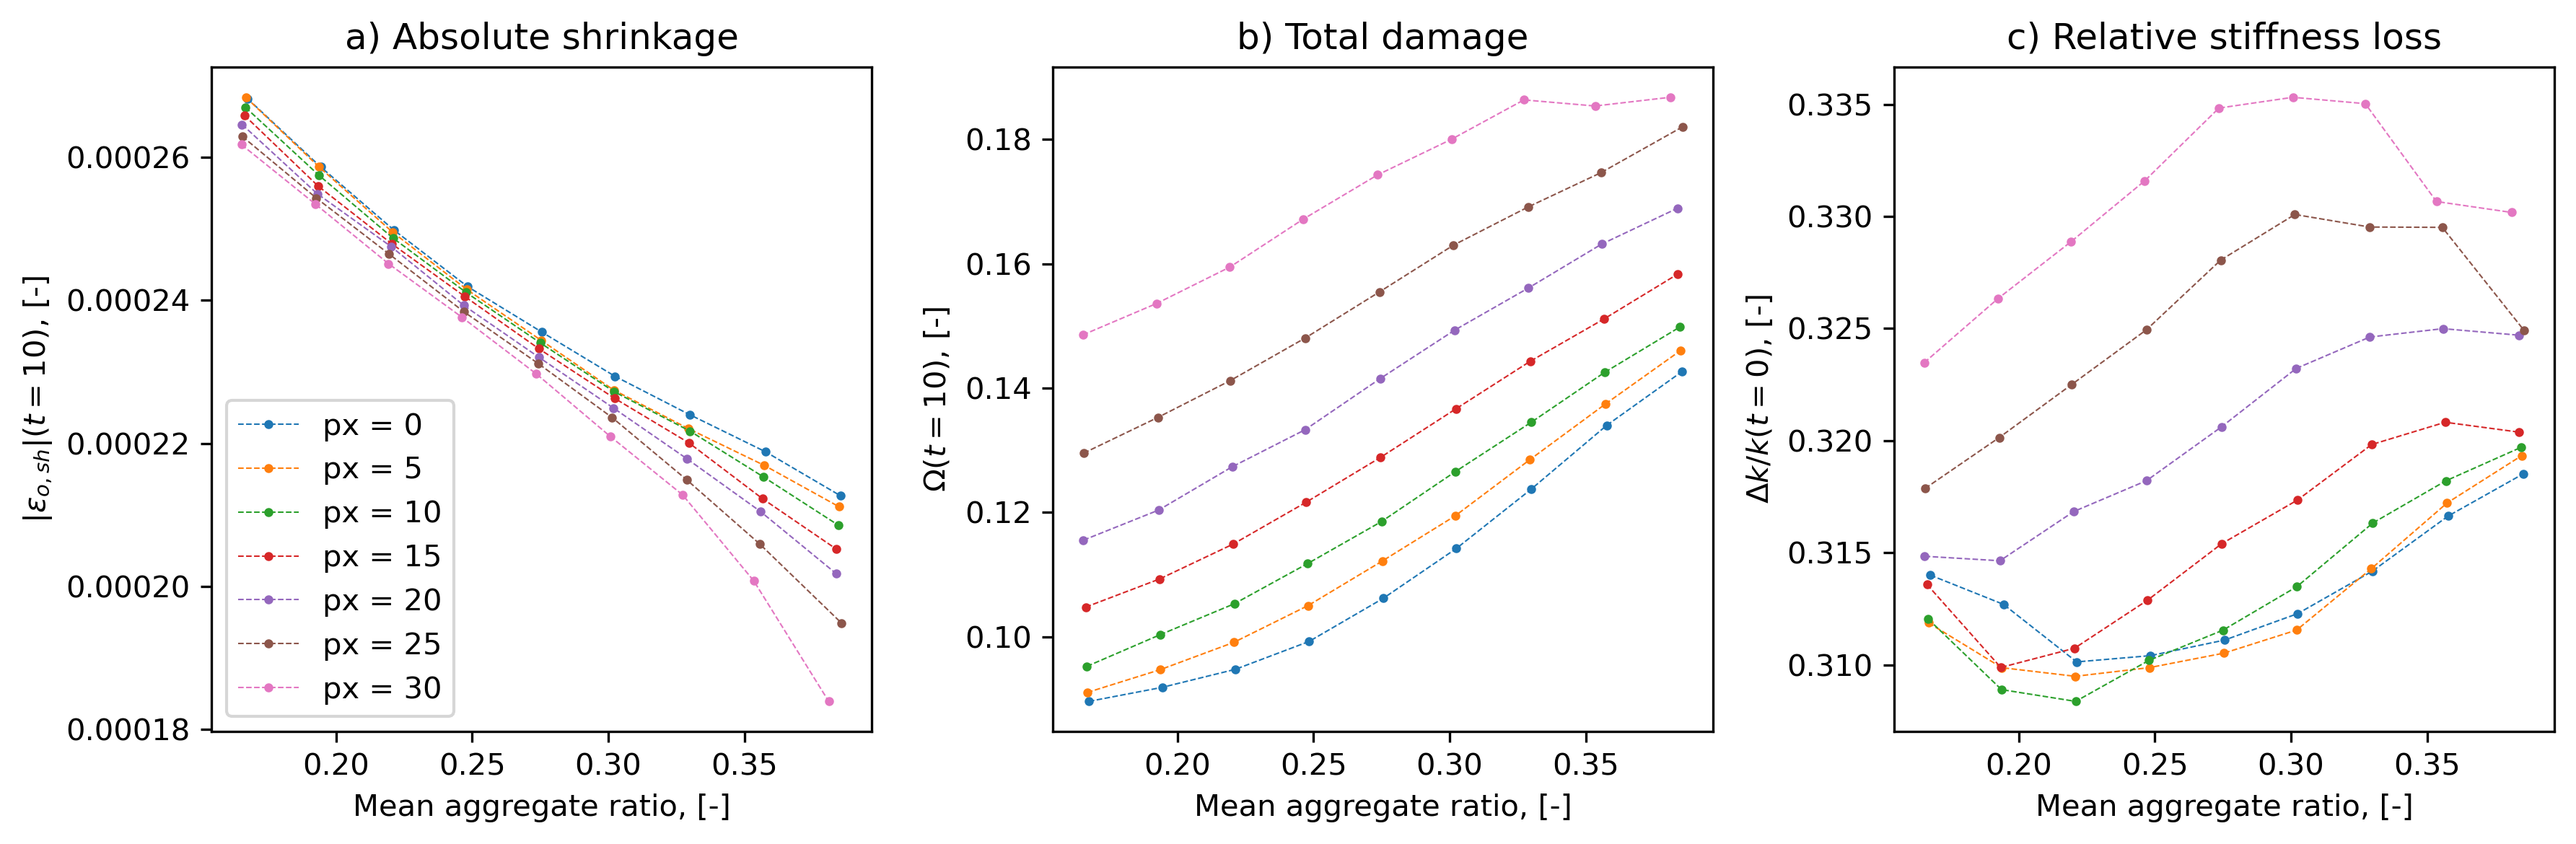

In [145]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), dpi=300)
axs[0].plot(vols.T, -shr.T, '--o', markersize=2, linewidth=0.5)
axs[0].set_ylabel('$|\epsilon_{o,sh}|(t=10)$, [-]')
axs[0].set_title('a) Absolute shrinkage')
axs[0].legend([f'px = {i*5}' for i in range(7)])
#axs[0].set_ylim([0, 0.0003])

axs[1].plot(vols.T, dam.T, '--o', markersize=2, linewidth=0.5)
axs[1].set_ylabel('$\Omega(t=10)$, [-]')
axs[1].set_title('b) Total damage')
#axs[1].set_ylim([0, 0.2])

axs[2].plot(vols.T, (stf_1.T-stf_2.T)/stf_1.T, '--o', markersize=2, linewidth=0.5)
axs[2].set_ylabel('$\Delta k / k(t=0)$, [-]')
axs[2].set_title('c) Relative stiffness loss')
#axs[2].set_ylim([0, 0.34])

for i in range(3):
    axs[i].set_xlabel('Mean aggregate ratio, [-]')
plt.tight_layout()

In [146]:
ids_0 = np.arange(len(df_n))
ids_5 = np.argwhere(volume_n[:,-5:].sum(axis=1)==0).flatten()
ids_10 = np.argwhere(volume_n[:,-10:].sum(axis=1)==0).flatten()
ids_15 = np.argwhere(volume_n[:,-15:].sum(axis=1)==0).flatten()
ids_20 = np.argwhere(volume_n[:,-20:].sum(axis=1)==0).flatten()
ids_25 = np.argwhere(volume_n[:,-25:].sum(axis=1)==0).flatten()
ids_30 = np.argwhere(volume_n[:,-30:].sum(axis=1)==0).flatten()

ids_n = [ids_0, ids_5, ids_10, ids_15, ids_20, ids_25, ids_30]

for i in range(len(ids_n)):
    for j in range(i+1, len(ids_n)):
        ids_n[i] = np.setdiff1d(ids_n[i], ids_n[j])

In [147]:
volumes = np.linspace(0.15, 0.4, 10)
vols = np.zeros((7, 9))
shr = np.zeros((7, 9))
dam = np.zeros((7, 9))
stf_1 = np.zeros((7, 9))
stf_2 = np.zeros((7, 9))
for i in range(7):
    vol_a = df['aggregate_ratio'][ids[i]].to_numpy()
    dam_a = df['damage'][ids[i]].to_numpy()
    shr_a = df['shrinkage'][ids[i]].to_numpy()
    stf_1_a = df['stiffness_1'][ids[i]].to_numpy()
    stf_2_a = df['stiffness_2'][ids[i]].to_numpy()
    for j in range(9):
        ix = np.argwhere((vol_a>volumes[j]) & (vol_a<volumes[j+1]))
        vols[i, j] = vol_a[ix].mean()
        shr[i, j] = shr_a[ix].mean()
        dam[i, j] = dam_a[ix].mean()
        stf_1[i, j] = stf_1_a[ix].mean()
        stf_2[i, j] = stf_2_a[ix].mean()

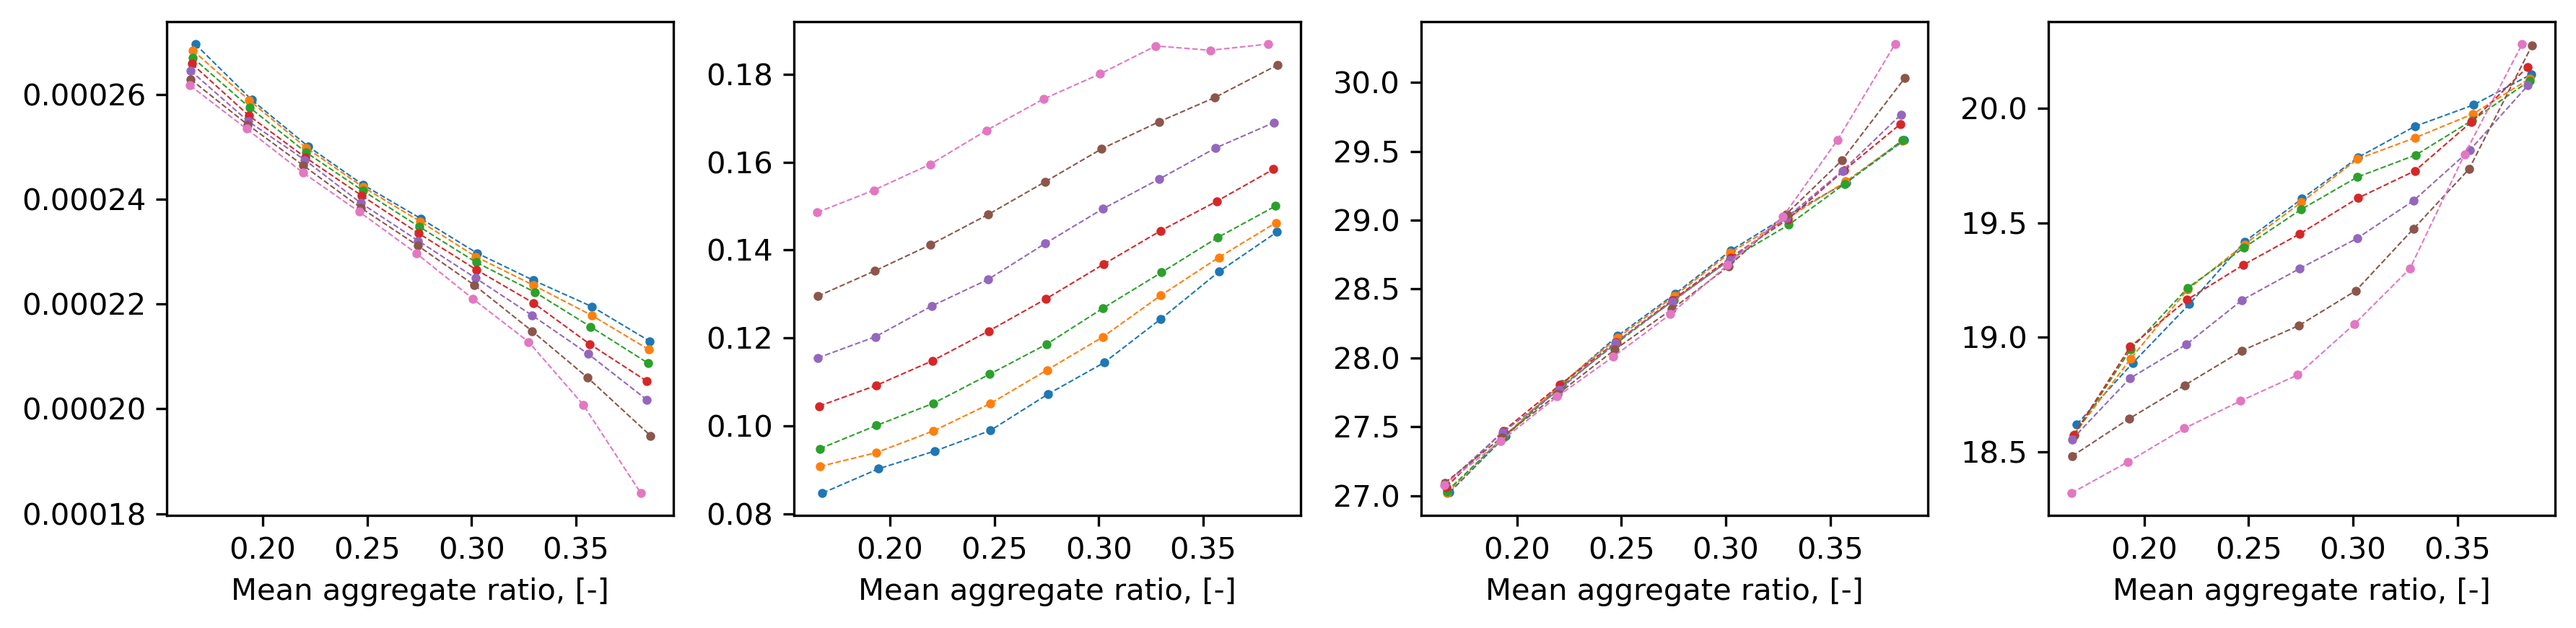

In [148]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 3), dpi=300)
axs[0].plot(vols.T, -shr.T, '--o', markersize=2, linewidth=0.5)
axs[1].plot(vols.T, dam.T, '--o', markersize=2, linewidth=0.5)
axs[2].plot(vols.T, stf_1.T/1000, '--o', markersize=2, linewidth=0.5)
axs[3].plot(vols.T, stf_2.T/1000, '--o', markersize=2, linewidth=0.5)
for i in range(4):
    axs[i].set_xlabel('Mean aggregate ratio, [-]')
plt.tight_layout()

In [149]:
volumes = np.linspace(0.15, 0.4, 10)
vols = np.zeros((7, 9))
shr = np.zeros((7, 9))
dam = np.zeros((7, 9))
stf_1 = np.zeros((7, 9))
stf_2 = np.zeros((7, 9))
for i in range(7):
    vol_a = df_n['aggregate_ratio'][ids_n[i]].to_numpy()
    dam_a = df_n['damage'][ids_n[i]].to_numpy()
    shr_a = df_n['shrinkage'][ids_n[i]].to_numpy()
    stf_1_a = df_n['stiffness_1'][ids_n[i]].to_numpy()
    stf_2_a = df_n['stiffness_2'][ids_n[i]].to_numpy()
    for j in range(9):
        ix = np.argwhere((vol_a>volumes[j]) & (vol_a<volumes[j+1]))
        vols[i, j] = vol_a[ix].mean()
        shr[i, j] = shr_a[ix].mean()
        dam[i, j] = dam_a[ix].mean()
        stf_1[i, j] = stf_1_a[ix].mean()
        stf_2[i, j] = stf_2_a[ix].mean()

C:\Users\Jorge\AppData\Local\Temp\ipykernel_20400\2469673457.py:15: RuntimeWarning: Mean of empty slice.
  vols[i, j] = vol_a[ix].mean()
c:\Users\Jorge\.conda\envs\home\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Jorge\AppData\Local\Temp\ipykernel_20400\2469673457.py:16: RuntimeWarning: Mean of empty slice.
  shr[i, j] = shr_a[ix].mean()
C:\Users\Jorge\AppData\Local\Temp\ipykernel_20400\2469673457.py:17: RuntimeWarning: Mean of empty slice.
  dam[i, j] = dam_a[ix].mean()
C:\Users\Jorge\AppData\Local\Temp\ipykernel_20400\2469673457.py:18: RuntimeWarning: Mean of empty slice.
  stf_1[i, j] = stf_1_a[ix].mean()
C:\Users\Jorge\AppData\Local\Temp\ipykernel_20400\2469673457.py:19: RuntimeWarning: Mean of empty slice.
  stf_2[i, j] = stf_2_a[ix].mean()
C:\Users\Jorge\AppData\Local\Temp\ipykernel_20400\2469673457.py:15: RuntimeWarning: Mean of empty slice.
  vols[i, j] = vol_a[ix].mean()


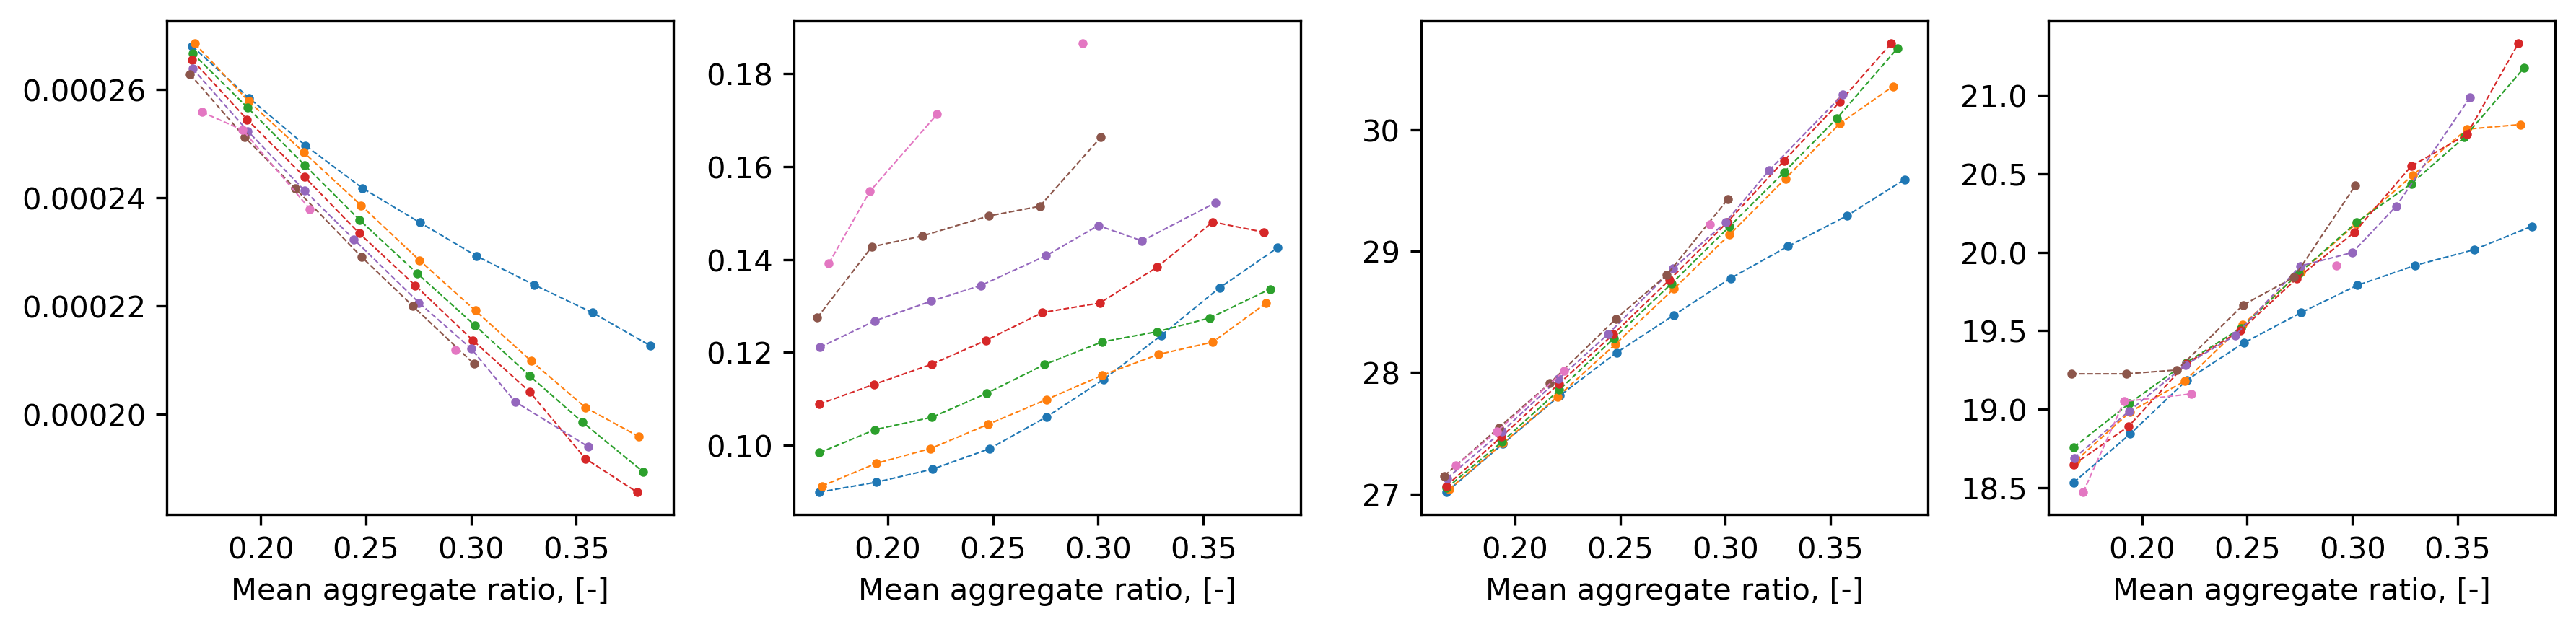

In [150]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 3), dpi=300)
axs[0].plot(vols.T, -shr.T, '--o', markersize=2, linewidth=0.5)
axs[1].plot(vols.T, dam.T, '--o', markersize=2, linewidth=0.5)
axs[2].plot(vols.T, stf_1.T/1000, '--o', markersize=2, linewidth=0.5)
axs[3].plot(vols.T, stf_2.T/1000, '--o', markersize=2, linewidth=0.5)
for i in range(4):
    axs[i].set_xlabel('Mean aggregate ratio, [-]')
plt.tight_layout()